In [1]:
import os
import tensorflow as tf
import splitfolders
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [2]:
# dzielenie zbioru na zbiór treningowy,validacyjny i testowy w proporcji 8:1:1
input_folder = "C:/Users/ElJanko/Desktop/data/data/"
output_folder= "C:/Users/ElJanko/Desktop/data2/data"
splitfolders.ratio(input_folder,output =output_folder , seed=42, ratio=(.8,.1,.1),group_prefix=None)

Copying files: 1200 files [00:00, 1255.24 files/s]


In [3]:
# inicializacja objektu oraz normalizacja i augumentacja danych
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip = True)

In [4]:
# wczytanie obrazów oraz tworzenie strumienia danych do zasilania procesu uczenia 
train_generator = datagen.flow_from_directory(
        "C:/Users/ElJanko/Desktop/data2/data/train/",
        target_size=(224, 224),
        batch_size=1,
        class_mode='categorical')

val_generator  = datagen.flow_from_directory(
        "C:/Users/ElJanko/Desktop/data2/data/val/",
        target_size=(224, 224),
        batch_size=1,
        class_mode='categorical')
test_generator  = datagen.flow_from_directory(
        "C:/Users/ElJanko/Desktop/data2/data/test/",
        target_size=(224, 224),
        batch_size=1,
        class_mode='categorical')



Found 960 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [5]:
# tworzenie modelu według specyfikacji podanych w opisie zadania 
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [6]:
# kompilacja modelu według specyfikacji w zadaniu, dodanie funkcji straty otaz metryki która pozwala monitowrowac jak dobrze model się uczy 
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


In [7]:
# trenowanie modelu, ustawienie liczby epoch na 8 jako najbardziej optymalną wartość, dodatkowo zostały przeprowadzone testy na 12,10,6 
history = model.fit(train_generator, epochs=8, validation_data=val_generator)


Epoch 1/8
960/960 [==============================] - 62s 64ms/step - loss: 0.6154 - accuracy: 0.7542 - val_loss: 0.2842 - val_accuracy: 0.8500
Epoch 2/8
960/960 [==============================] - 62s 64ms/step - loss: 0.1404 - accuracy: 0.9490 - val_loss: 0.0899 - val_accuracy: 0.9750
Epoch 3/8
960/960 [==============================] - 61s 64ms/step - loss: 0.0906 - accuracy: 0.9760 - val_loss: 0.0755 - val_accuracy: 0.9500
Epoch 4/8
960/960 [==============================] - 62s 64ms/step - loss: 0.0633 - accuracy: 0.9802 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/8
960/960 [==============================] - 62s 65ms/step - loss: 0.0451 - accuracy: 0.9906 - val_loss: 0.0427 - val_accuracy: 0.9667
Epoch 6/8
960/960 [==============================] - 62s 65ms/step - loss: 0.0447 - accuracy: 0.9896 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/8
960/960 [==============================] - 62s 64ms/step - loss: 0.0339 - accuracy: 0.9937 - val_loss: 0.0019 - val_accuracy: 1.0000

In [11]:
# zapisanie modelu 
model.save('C:/Users/ElJanko/Desktop/data2/zadanie_rekrutacyjne0.h5')

In [6]:
# ładowanie modelu tylko wtedy jeśli nie chcemy go od nowa trenować 
model = tf.keras.models.load_model('C:/Users/ElJanko/Desktop/data2/zadanie_rekrutacyjne1.h5')


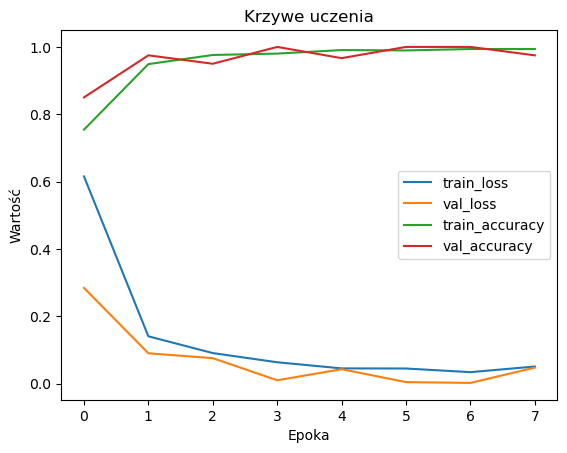

In [8]:
#wykreślenie krzywych uczenia modelu 
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Krzywe uczenia')
plt.xlabel('Epoka')
plt.ylabel('Wartość')
plt.legend()
plt.show()

In [12]:
# testowanie model na danych testowych
test_loss, test_accuracy = model.evaluate(test_generator)

# obliczanie predykcji modelu na danych testowych
y_pred = model.predict(test_generator)


# obliczanie miary jakości
precision = precision_score(y_true=test_generator.classes, y_pred=np.argmax(y_pred, axis=1), average='macro')
recall = recall_score(y_true=test_generator.classes, y_pred=np.argmax(y_pred, axis=1), average='macro')
f1 = f1_score(y_true=test_generator.classes, y_pred=np.argmax(y_pred, axis=1), average='macro')


print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


120/120 [==============================] - 1s 8ms/step
Test loss: 0.015809882432222366
Test accuracy: 0.9916666746139526
Precision: 0.30043566926214316
Recall: 0.30000000000000004
F1-score: 0.3001782902658146


1/1 [==============================] - 0s 25ms/step


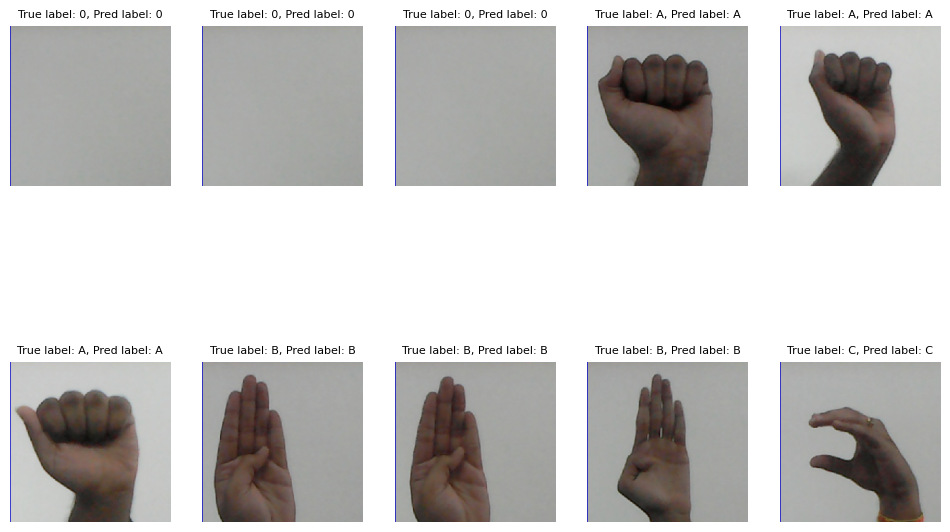

In [10]:
classes = ['0', 'A', 'B', 'C']


# lista 10 losowych obrazów z folderu test
test_images = []
for class_name in classes:
    images_path = os.path.join('C:/Users/ElJanko/Desktop/data2/data/test', class_name)
    images_list = os.listdir(images_path)
    random.shuffle(images_list)
    test_images.extend([os.path.join(images_path, img_name) for img_name in images_list[:3]])

# wyświetlenie wyniku predykcji dla każdego obrazu
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(test_images[:10]):
    # wczytanie obrazu
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

# predykcja etykiety obrazu
    pred = model.predict(x)[0]
    pred_label = np.argmax(pred)

    # Prawdziwa etykieta obrazu
    true_label = classes.index(img_path.split(os.path.sep)[-2])

# wyświetlenie obrazu i wyniku predykcji
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True label: {classes[true_label]}, Pred label: {classes[pred_label]}",fontsize=8)
plt.show()


